# Análise Exploratória de Dados - NYC Metro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('mode.chained_assignment', None)

## Leitura dos dados
- Os dados de NYC Metro estão dividios em 8 arquivos CSVs com informações de 2010 à 2017.
- O layout é o mesmo para todos
- A base de 2017 não contém informações do ano todo
- Será feito uma análise com uma das bases (2016)

In [2]:
df = pd.read_csv("../data/raw/2016.csv.gz")

In [3]:
df.shape

(10130791, 10)

In [4]:
df

,time,ca,unit,scp,station,linename,division,desc,entries,exits
0,2016-01-01 00:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,REGULAR,5477257.0,1848890.0
1,2016-01-01 00:00:00,A002,R051,02-00-01,59 ST,NQR456,BMT,REGULAR,5043156.0,1101348.0
2,2016-01-01 00:00:00,A002,R051,02-03-00,59 ST,NQR456,BMT,REGULAR,624029.0,2352788.0
3,2016-01-01 00:00:00,A002,R051,02-03-01,59 ST,NQR456,BMT,REGULAR,5006519.0,7904628.0
4,2016-01-01 00:00:00,A002,R051,02-03-02,59 ST,NQR456,BMT,REGULAR,4734413.0,6529179.0
...,...,...,...,...,...,...,...,...,...,...
10130786,2016-12-31 23:53:08,PTH11,R545,00-04-00,14TH STREET,1,PTH,REGULAR,1384.0,18140.0
10130787,2016-12-31 23:54:43,PTH01,R549,00-01-03,NEWARK HW BMEBE,1,PTH,REGULAR,81615.0,138104.0
10130788,2016-12-31 23:56:19,PTH01,R549,00-01-04,NEWARK HW BMEBE,1,PTH,REGULAR,115.0,44579.0
10130789,2016-12-31 23:57:15,PTH16,R550,01-01-05,LACKAWANNA,1,PTH,REGULAR,382645.0,210079.0


## Missing data

In [5]:
df.isnull().sum()

time        0
ca          0
unit        0
scp         0
station     0
linename    0
division    0
desc        0
entries     0
exits       0
dtype: int64

## Tipo dos dados (dtypes)

In [6]:
df.dtypes

time         object
ca           object
unit         object
scp          object
station      object
linename     object
division     object
desc         object
entries     float64
exits       float64
dtype: object

## Conversão dos dtypes
A base de dados é grande, sendo um dos motivos para a análise está sendo feita com um dataset apenas ao invés de juntar todos. Nessa etapa é aplicado uma transformação nos dados que reduz o tamanho em memória. Além de fazer as conversões necessários (por exemplo, datetime)

In [7]:
# df.info(memory_usage="deep")

In [8]:
df["time"] = pd.to_datetime(df["time"])

In [9]:
# categorical_cols = ['ca', 'unit', 'station', 'linename', 'division', 'desc']

In [10]:
# df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category'))

In [11]:
# df.info(memory_usage="deep")

## Estatísticas básicas

### Colunas numéricas 

In [12]:
df.describe()

,entries,exits
count,1.013079e+07,1.013079e+07
mean,3.553558e+07,2.857013e+07
std,1.956976e+08,1.757205e+08
min,0.000000e+00,0.000000e+00
25%,5.728980e+05,2.939460e+05
50%,2.598583e+06,1.508472e+06
75%,6.553944e+06,4.660509e+06
max,2.147484e+09,2.097170e+09


### Categorias

In [13]:
df.describe(include=['O', 'category'])

,ca,unit,scp,station,linename,division,desc
count,10130791,10130791,10130791,10130791,10130791,10130791,10130791
unique,737,470,219,379,128,6,2
top,PTH05,R549,00-00-00,34 ST-PENN STA,1,IRT,REGULAR
freq,53905,129870,1014726,220547,1141700,3740192,10088401


### Data

In [14]:
df.describe(include=['datetime'])

/home/milton/anaconda3/envs/nyc-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,time
count,10130791
unique,585510
top,2016-10-01 12:00:00
freq,2419
first,2016-01-01 00:00:00
last,2016-12-31 23:59:00


## Distribuição de "Desc"

In [15]:
df['desc'].value_counts(normalize=True)

REGULAR       0.995816
RECOVR AUD    0.004184
Name: desc, dtype: float64

## Grão da base
Análise do grão da base, identificação das séries temporais (nível de detalhe), distribuição das categorias.
Para ajudar a entender o contexto, os dados e a formação das linhas, foi utilizado informações do Wipedia (https://pt.wikipedia.org/wiki/Metropolitano_de_Nova_Iorque).

In [16]:
df_nunique_values = df.groupby('ca').nunique()
df_nunique_values

,time,unit,scp,station,linename,division,desc,entries,exits
ca,,,,,,,,,
A002,2216,1,12,1,2,1,2,21667,21394
A006,2228,1,8,1,2,1,2,17427,17328
A007,2219,1,6,1,2,1,2,8740,8692
A010,2231,1,8,1,2,1,2,17742,17786
A011,2265,1,6,1,2,1,2,11516,11806
...,...,...,...,...,...,...,...,...,...
S101,2350,1,13,1,1,1,2,27304,61
S101A,2173,1,13,1,1,1,2,23175,70
S102,2270,1,7,1,1,1,2,10634,15


In [17]:
df_nunique_values.max()

time        53792
unit            1
scp            27
station         2
linename        2
division        1
desc            2
entries     44419
exits       43362
dtype: int64

In [18]:
# Ocorrência de valores distintos
(df_nunique_values > 1).sum()

time        737
unit          0
scp         735
station       3
linename     61
division      0
desc        713
entries     736
exits       737
dtype: int64

- É possível notar que dado uma CA (Control Area), os valores de UNIT e DIVISION são os mesmos.
- As SCPs (Subunits) variam bastante, importante para formação do grão da base e na identificação das séries. 
- STATION e LINENAME aparecem com poucas variações.
- DESC, que tem apenas dois valores possíveis (em 2016), não está vinculado ao CA. Ocorre bastante
- Algumas informações ENTRIES, EXITS e TIME variam bastante, o que já era esperado.

In [19]:
# CAs com mais de um tipo STATION
df_nunique_values[df_nunique_values['station'] > 1]

,time,unit,scp,station,linename,division,desc,entries,exits
ca,,,,,,,,,
C027,2217,1,5,2,1,1,2,11007,11037
C028,2215,1,4,2,1,1,2,4401,3861
JFK03,2993,1,11,2,1,1,2,20520,20808


In [20]:
# Analisando o agrupamento por CA e SCP
df_nunique_values_ca_scp = df.groupby(['ca', 'scp']).nunique()
df_nunique_values_ca_scp

time  unit  station  linename  division  desc  entries  exits
ca    scp                                                                    
A002  02-00-00  2173     1        1         2         1     2     2106   2144
      02-00-01  2189     1        1         2         1     2     2137   2152
      02-03-00  2216     1        1         2         1     2     2183   2196
      02-03-01  2216     1        1         2         1     2     2062   2199
      02-03-02  2214     1        1         2         1     2     2132   2198
...              ...   ...      ...       ...       ...   ...      ...    ...
TRAM2 00-00-01  2213     1        1         1         1     2     2097   1836
      00-03-00  2211     1        1         1         1     2     1907   1493
      00-03-01  2213     1        1         1         1     2     1944   1575
      00-05-00  2212     1        1         1         1     2      354      1
      00-05-01  2212     1        1         1         1     2        1     32

[4719 rows x 8 columns]

In [21]:
df_nunique_values_ca_scp.max()

time        2401
unit           1
station        2
linename       2
division       1
desc           2
entries     2322
exits       2358
dtype: int64

In [22]:
# Ocorrência de valores distintos
(df_nunique_values_ca_scp > 1).sum()

time        4706
unit           0
station       19
linename     485
division       0
desc        4433
entries     4467
exits       4495
dtype: int64

In [23]:
df_nunique_values_ca_scp[df_nunique_values_ca_scp['station'] > 1]

time  unit  station  linename  division  desc  entries  exits
ca    scp                                                                    
C027  00-00-00  2216     1        2         1         1     2     2209   2210
      00-00-01  2215     1        2         1         1     2     2213   2207
      00-00-02  2217     1        2         1         1     2     2178   2208
      00-03-00  2216     1        2         1         1     2     2194   2204
      00-03-01  2215     1        2         1         1     2     2213   2208
C028  01-05-00  2211     1        2         1         1     2      104      1
      01-05-01  2215     1        2         1         1     2        1     26
      01-06-00  2212     1        2         1         1     2     2209   2202
      01-06-01  2211     1        2         1         1     2     2087   1632
JFK03 00-00-01  2385     1        2         1         1     2     2244   2253
      00-00-02  2366     1        2         1         1     2     2243   2264
      00-00-03  2385     1        2         1         1     2     2267   2278
      00-00-04  2362     1        2         1         1     2     2271   2267
      00-00-05  2361     1        2         1         1     2     2202   2275
      00-03-00  2329     1        2         1         1     2     2217   2230
      00-03-01  2341     1        2         1         1     2     2155   2239
      00-03-02  2327     1        2         1         1     2     2243   2247
      00-03-03  2397     1        2         1         1     2     2286   2303
      00-03-04  2401     1        2         1         1     2     2174   2257

In [24]:
df.drop_duplicates(['ca', 'scp', 'station', 'linename']).shape

(5223, 10)

In [25]:
df.drop_duplicates(['ca', 'scp', 'desc', 'time']).shape

(10130791, 10)

In [26]:
df.shape

(10130791, 10)

## Distribuição do "ca"

In [27]:
df_ca_count = df['ca'].value_counts()
df_ca_count

PTH05    53905
R610     51484
PTH16    45390
PTH07    43523
A046     43276
         ...  
N702A       50
N701A       45
N700A       35
N701        30
N702        30
Name: ca, Length: 737, dtype: int64

## Análise de uma linha (ca e scp)
- Após identificar o grão e a formação das séries temporais, será selecionado uma linha através da filtragem do CA e SCP para entender melhor dos dados. 
- Essa análise também foi realizada com outras amostras, que apresentaram alguns comportamentos parecidos e outros mais específicos. Os dados costumam apresentar bastante ruídos e necessitam de tratamento. 

In [29]:
ca = 'R610'
scp = '00-04-01'

In [30]:
df_ca_scp_example = df[(df['ca'] == ca) & (df['scp'] == scp)]

In [31]:
df_ca_scp_example.reset_index(inplace=True, drop=True)
df_ca_scp_example

,time,ca,unit,scp,station,linename,division,desc,entries,exits
0,2016-01-01 00:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1345628.0,754644.0
1,2016-01-01 04:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1345672.0,754684.0
2,2016-01-01 08:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1345677.0,754703.0
3,2016-01-01 12:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1345685.0,754712.0
4,2016-01-01 16:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1345703.0,754725.0
...,...,...,...,...,...,...,...,...,...,...
2340,2016-12-31 04:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67250064.0,16836034.0
2341,2016-12-31 08:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67250088.0,16836044.0
2342,2016-12-31 12:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67250088.0,16836044.0
2343,2016-12-31 16:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67250112.0,16836052.0


### Estatísticas das categorias

In [32]:
df_ca_scp_example.describe(include=['O', 'category'])

,ca,unit,scp,station,linename,division,desc
count,2345,2345,2345,2345,2345,2345,2345
unique,1,1,1,1,1,1,2
top,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR
freq,2345,2345,2345,2345,2345,2345,2340


### Visualização dos valores acumulados

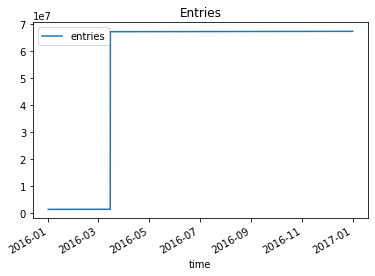

In [33]:
df_ca_scp_example.plot(x='time', y='entries', title='Entries')

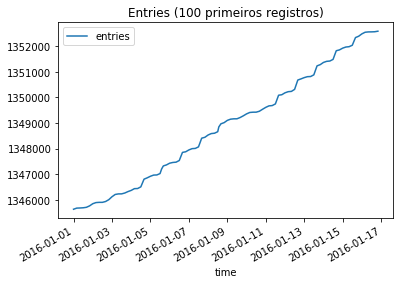

In [34]:
df_ca_scp_example.head(100).plot(x='time', y='entries', title='Entries (100 primeiros registros)')

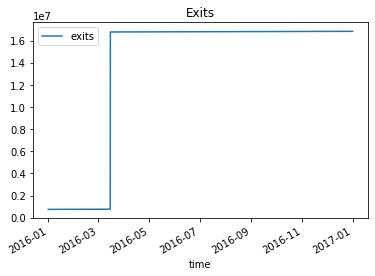

In [35]:
df_ca_scp_example.plot(x='time', y='exits', title='Exits')

- Há uma diferença de escala bem grande nos valores de ENTRIES e EXITS, uma mudança repentina em ambos os casos 

### Análise da distribuição dos intervalos da amostra

In [36]:
df_ca_scp_example['time_diff'] = df_ca_scp_example['time'] - df_ca_scp_example.shift(1)['time']

In [37]:
df_ca_scp_example['time_diff'].describe()

count                         2344
mean     0 days 03:44:44.641638225
std      0 days 00:57:06.975832164
min                0 days 00:00:18
25%                0 days 04:00:00
50%                0 days 04:00:00
75%                0 days 04:00:00
max                0 days 12:00:00
Name: time_diff, dtype: object

- Os itervalos mais comuns na base são de 4h entre as instâncias, entretanto há valores menores com menos de 1h e um intervalo de 12h, o que indica uma falta de dados em algum ponto.

In [38]:
df_ca_scp_example[df_ca_scp_example['time_diff'] < '02:00:00']

,time,ca,unit,scp,station,linename,division,desc,entries,exits,time_diff
28,2016-01-05 13:54:44,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347196.0,755229.0,0 days 01:54:44
30,2016-01-05 16:37:58,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347325.0,755239.0,0 days 00:37:58
45,2016-01-08 00:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1348528.0,755869.0,0 days 00:33:13
49,2016-01-08 13:23:58,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1348844.0,755901.0,0 days 01:23:58
116,2016-01-19 12:57:51,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1353379.0,758028.0,0 days 00:57:51
...,...,...,...,...,...,...,...,...,...,...,...
2236,2016-12-14 13:02:17,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67242552.0,16832714.0,0 days 00:01:20
2237,2016-12-14 13:03:37,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67242552.0,16832714.0,0 days 00:01:20
2238,2016-12-14 13:05:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67242560.0,16832714.0,0 days 00:01:23
2239,2016-12-14 13:06:22,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67242584.0,16832714.0,0 days 00:01:22


In [39]:
df_ca_scp_example.iloc[25:35]

,time,ca,unit,scp,station,linename,division,desc,entries,exits,time_diff
25,2016-01-05 04:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1346962.0,755213.0,0 days 04:00:00
26,2016-01-05 08:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1346967.0,755218.0,0 days 04:00:00
27,2016-01-05 12:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347021.0,755222.0,0 days 04:00:00
28,2016-01-05 13:54:44,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347196.0,755229.0,0 days 01:54:44
29,2016-01-05 16:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347314.0,755237.0,0 days 02:05:16
30,2016-01-05 16:37:58,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347325.0,755239.0,0 days 00:37:58
31,2016-01-05 20:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347359.0,755275.0,0 days 03:22:02
32,2016-01-06 00:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347426.0,755418.0,0 days 04:00:00
33,2016-01-06 04:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347455.0,755443.0,0 days 04:00:00
34,2016-01-06 08:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1347466.0,755446.0,0 days 04:00:00


- Neste exemplo, aparecem valores fora do intervalo de 4h, entretanto os valores no intervalo também aparecem.

### Reindexação com frequência

In [40]:
df_ca_scp_example = df_ca_scp_example.set_index('time')
df_ca_scp_example = df_ca_scp_example.asfreq('4H')

- Nessa amostra foi possível utilizar a frequência de 4h para indexar a base corretamente, removendo boa parte dos ruídos

In [41]:
df_ca_scp_example.reset_index(inplace=True)

In [42]:
df_ca_scp_example['time_diff'] = df_ca_scp_example['time'] - df_ca_scp_example.shift(1)['time']

### Diferenciação com lag 1 para obter os dados por dia ao invés dos valores acumulados

In [43]:
df_ca_scp_example['entries_diff'] = df_ca_scp_example['entries'] - df_ca_scp_example['entries'].shift(1)

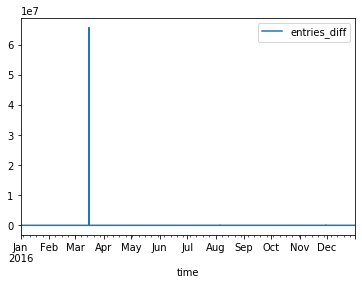

In [44]:
df_ca_scp_example.plot(x='time', y='entries_diff')

In [45]:
df_ca_scp_example['exits_diff'] = df_ca_scp_example['exits'] - df_ca_scp_example['exits'].shift(1)

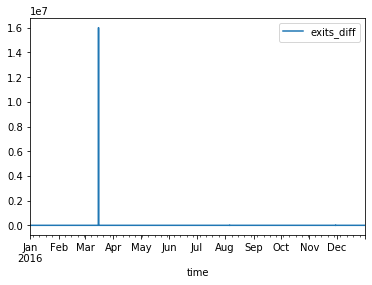

In [46]:
df_ca_scp_example.plot(x='time', y='exits_diff')

### Análise do outlier
Quando é aplicado a diferenciação, apenas um um valor fica com a escala bem distinta, enquanto nos valores acumulados os depados estavam separados em duas faixas, basicamente. Ressaltando que esse comportamento é específico desta amostra, o que não é garantido para todas.

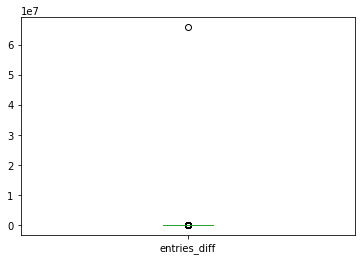

In [47]:
df_ca_scp_example['entries_diff'].plot(kind='box')

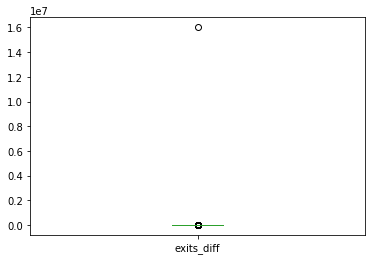

In [48]:
df_ca_scp_example['exits_diff'].plot(kind='box')

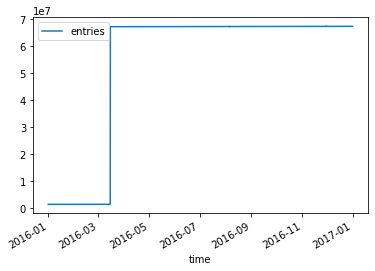

In [49]:
df_ca_scp_example.drop(1912).plot(x='time', y='entries')

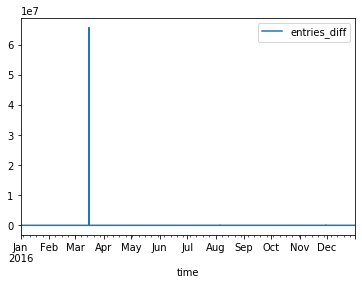

In [50]:
df_ca_scp_example.plot(x='time', y='entries_diff')

#### Substituição do outlier 
(encontrado na diferenciação por conta da mudança de escala) pelo valor do mesmo dia na semana anterior

In [51]:
df_ca_scp_example['entries_diff'].sort_values(ascending=False).head()

448     65730662.0
2080         400.0
2008         384.0
2038         384.0
2014         376.0
Name: entries_diff, dtype: float64

In [52]:
# lag de 6 para obter valor do dia anterior (já que o intervalo é de 4h => 4h * 6 = 24)
df_ca_scp_example.loc[[448-6, 448]]

,time,ca,unit,scp,station,linename,division,desc,entries,exits,time_diff,entries_diff,exits_diff
442,2016-03-14 16:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,1377894.0,768100.0,0 days 04:00:00,253.0,33.0
448,2016-03-15 16:00:00,R610,R057,00-04-01,ATL AV-BARCLAY,2345BDNQR,IRT,REGULAR,67108896.0,16777234.0,0 days 04:00:00,65730662.0,16008935.0


In [53]:
df_ca_scp_example.loc[448, 'entries_diff'] = df_ca_scp_example.loc[442, 'entries_diff']

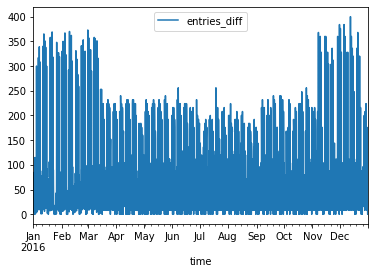

In [54]:
df_ca_scp_example.plot(x='time', y='entries_diff')

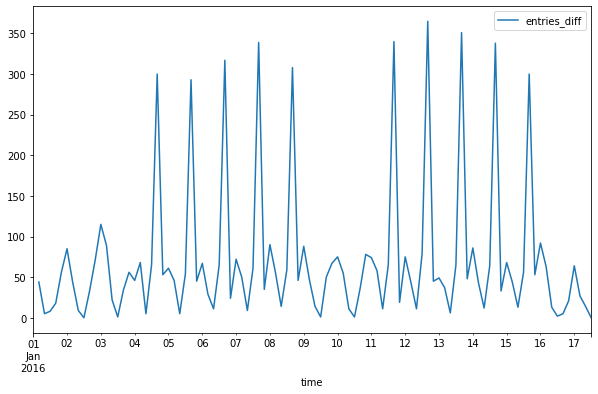

In [55]:
df_ca_scp_example.head(100).plot(x='time', y='entries_diff', figsize=(10, 6))

### Exportar dados dessa linha para realizar Forecast
- Essa amostra será utilizada para construção de um modelo de série temporal posteriormente

In [56]:
df_ca_scp_example.to_csv('../data/processed/data_sample.csv', index=False)

## Análise de algumas linhas
- A análise acima foi para uma linha específica. Nesta seção, será apresentado o comportamento de outras linhas e alguns tratamentos que ajudam na limpeza e manipulação dos dados

### Seleção de amostras

In [57]:
list_top_3_ca = df_ca_count.index[:3].tolist()

In [58]:
list_ca_scp_top = []
for ca in list_top_3_ca:
    list_scp = df[df['ca'] == ca]['scp'].value_counts().index[:3].tolist()
    list_ca_scp_top.append((ca, list_scp))

In [59]:
list_ca_scp_top

[('PTH05', ['00-04-00', '00-00-02', '00-00-07']),
 ('R610', ['00-06-01', '00-04-01', '00-03-00']),
 ('PTH16', ['01-01-00', '01-00-05', '01-00-00'])]

### Visualiação do valor de Entries (acumulado)

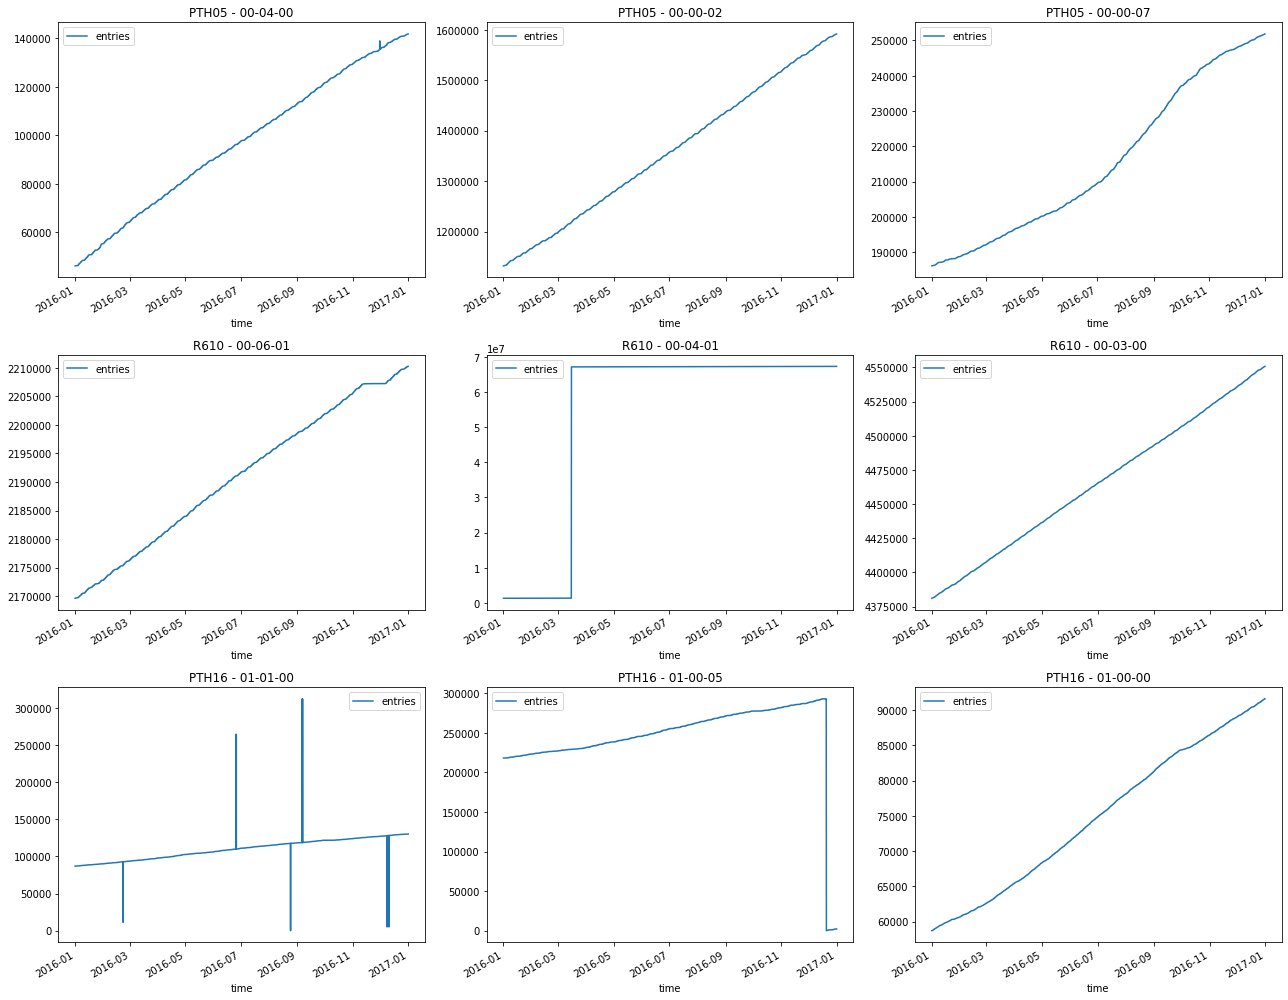

In [60]:
fig, axs = plt.subplots(3, 3, figsize=(18,14))

for i, ca in enumerate(list_ca_scp_top):
    for j, scp in enumerate(list_ca_scp_top[i][1]):
        df_ca_scp_sample = df[(df['ca'] == ca[0]) & (df['scp'] == scp)]
        df_ca_scp_sample.plot(x='time', y='entries', ax=axs[i][j], title="{} - {}".format(ca[0], scp))
        
plt.tight_layout()

É importante notar que aparecem bastante ruiídos nos valores acumulados e em situações diferentes

### Distribuição da Diferenciação de Entries (valor a cada 4h, ao invés de acumulado)
- Para facilitar a visualização da distribuição, há uma remoção de outliers, considerando valores muito discrepantes de forma simples (> 4000)

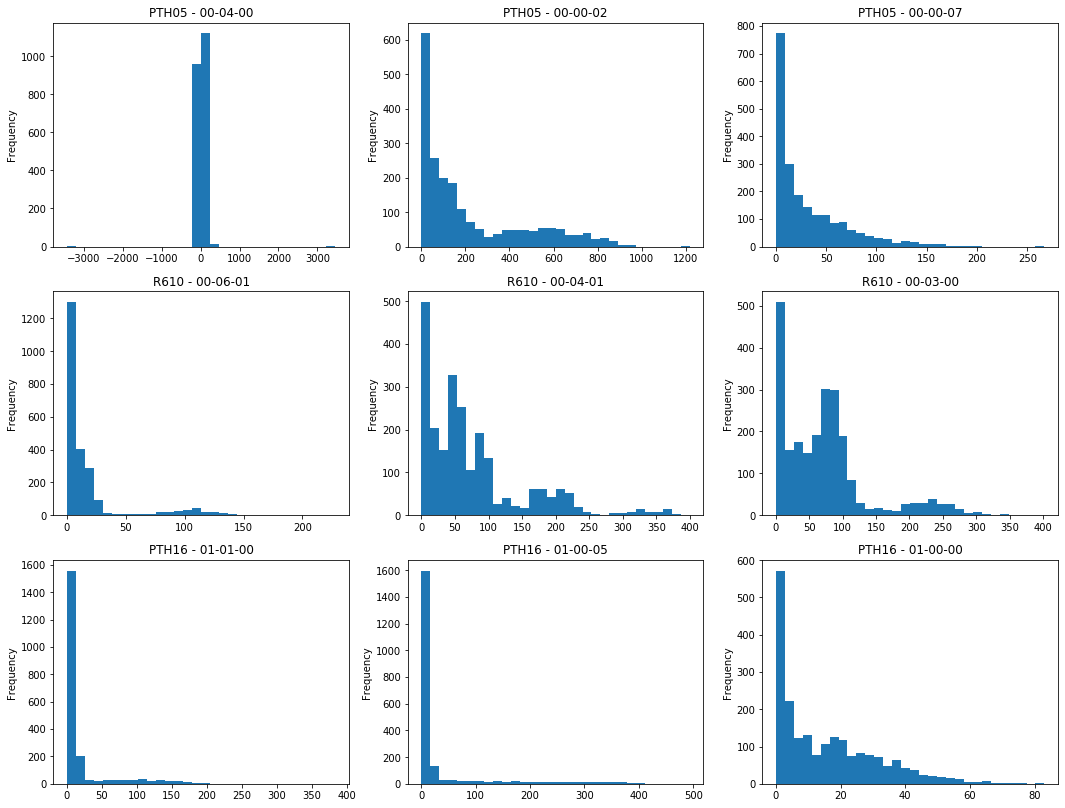

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(18,14))

for i, ca in enumerate(list_ca_scp_top):
    for j, scp in enumerate(list_ca_scp_top[i][1]):
        df_ca_scp_sample = df[(df['ca'] == ca[0]) & (df['scp'] == scp)]
        df_ca_scp_sample['entries_diff'] = df_ca_scp_sample['entries'] - df_ca_scp_sample.shift(1)['entries']
        
        outliers = df_ca_scp_sample['entries_diff'].abs() > 4000
        df_ca_scp_sample.loc[outliers, 'entries_diff'] = None
        df_ca_scp_sample['entries_diff'].plot(kind='hist', bins=30, ax=axs[i][j], title="{} - {}".format(ca[0], scp))

- É preciso melhor o tratamento dos dados melhor para cada linha, entretando já é possível notar uma diferença entre as amostras.
- Já era esperado um volume de dados diferente devido a natureza do problema, em que algumas linhas são mais utilizadas que outras.
- É importante notar a diferença para decisões de modelagem (forecast).

### Limpeza nos dados
Cálculo da diferenciação e detecção dos outliers com zscore.
- Após a detecção é atribuído o valor zero
- Plot da soma acumulada a partir dos valores gerados

In [62]:
def outlier_z_score(df_col):
    threshold = 3
    mean = df_col.mean()
    std = df_col.std()
    df_outliers = (mean - df_col) / std
    index = df_outliers[df_outliers.abs() > threshold].index
    
    return index

In [63]:
def outlier_boxplot(df_col):
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    iqr = q3 - q1 

    idx_outlier = df_col[(df_col <= q1 - 1.5 * iqr) | (df_col >= q1 + 1.5 *iqr)].index.tolist()
    return idx_outlier

#### Limpeza e aplicação em uma amostra

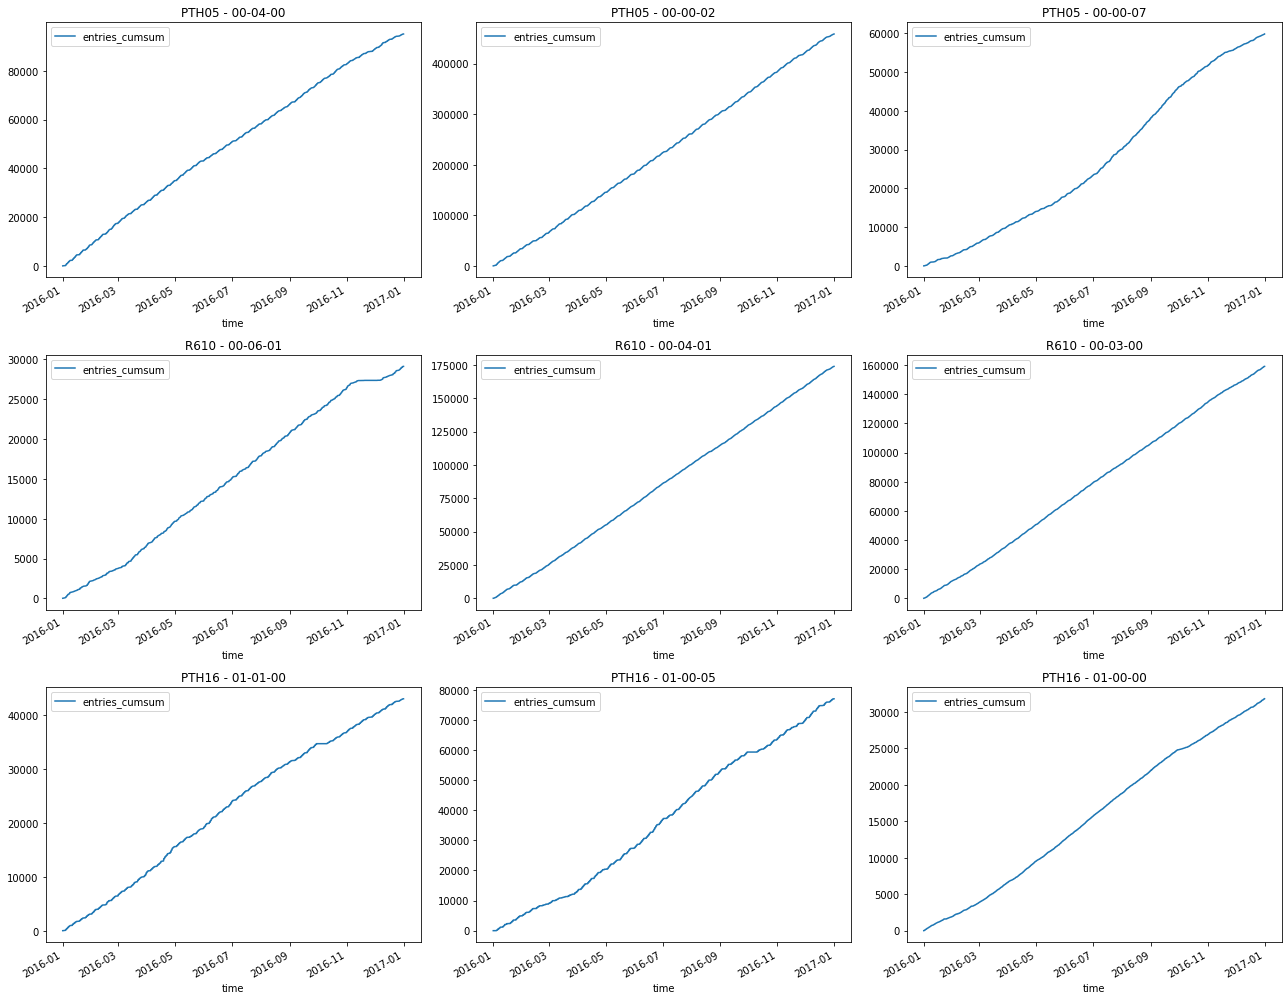

In [64]:
fig, axs = plt.subplots(3, 3, figsize=(18,14))

for i, ca in enumerate(list_ca_scp_top):
    for j, scp in enumerate(list_ca_scp_top[i][1]):
        df_ca_scp_sample = df[(df['ca'] == ca[0]) & (df['scp'] == scp)]
        df_ca_scp_sample = df_ca_scp_sample.reset_index(drop=True)
        
        df_ca_scp_sample['entries_diff'] = df_ca_scp_sample['entries'] - df_ca_scp_sample['entries'].shift(1)
        
        idx_outliers = outlier_z_score(df_ca_scp_sample['entries_diff'])
        df_ca_scp_sample.loc[idx_outliers, 'entries_diff'] = 0
        
        df_ca_scp_sample['entries_cumsum'] = df_ca_scp_sample['entries_diff'].cumsum()
        df_ca_scp_sample.plot(x='time', y='entries_cumsum', ax=axs[i][j], title="{} - {}".format(ca[0], scp))
        
plt.tight_layout()

### Agrupamento e aplicação da transformação na base toda

In [65]:
df['entries_diff'] = df.groupby(['ca', 'scp', 'station', 'linename'])['entries'].transform(pd.Series.diff)

In [66]:
idx_outliers = df.groupby(['ca', 'scp', 'station', 'linename']).apply(
    lambda x: outlier_boxplot(x['entries_diff'])
)

In [67]:
idx_total_outliers = []
for i in idx_outliers:
    idx_total_outliers.extend(i)

In [68]:
df.loc[idx_total_outliers, 'entries_diff'] = 0

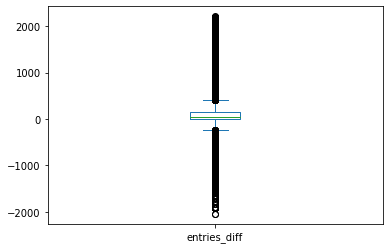

In [69]:
df['entries_diff'].plot(kind='box')

In [70]:
df.loc[df['entries_diff'] < 0, 'entries_diff'] = 0

O valor negativo é proveniente da diferenciação quando os dados estão em escalas distintas. Como a entrada de pessoas é um valor só pode ser positivo, será feita uma correção nesses valores para zero.

### Novo cumulativo com dados ajustados
Agrupamento de acordo com o grão da base

In [71]:
df['my_entries'] = df.groupby(['ca', 'scp', 'station', 'linename'])['entries_diff'].transform(pd.Series.cumsum)

In [72]:
df_max_cumulative_entries = df.groupby(['ca', 'scp', 'station', 'linename'])['my_entries'].max()

In [73]:
df_max_cumulative_entries.sort_values(ascending=False, inplace=True)

#### Distribuição do valor acumulado de entries

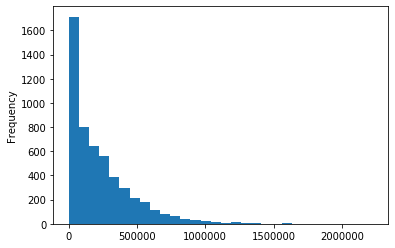

In [74]:
df_max_cumulative_entries.plot(kind='hist', bins=30)

#### Top 10 linhas com mais entradas (entries)

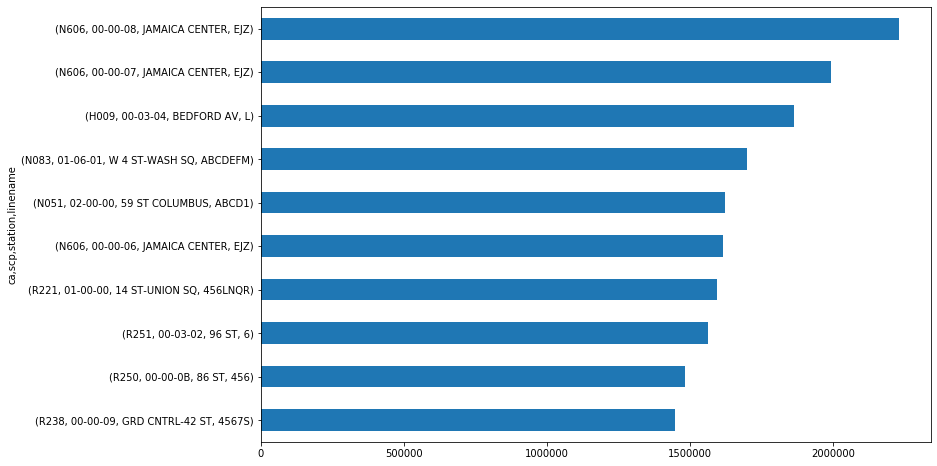

In [75]:
df_max_cumulative_entries.head(10).sort_values().plot(kind='barh', figsize=(12,8))

### Station

In [76]:
df_station_entries = df.groupby('station')['entries_diff'].sum()

In [77]:
df_station_entries.sort_values(ascending=False)

station
34 ST-PENN STA     30449807.0
86 ST              24831692.0
14 ST-UNION SQ     23908700.0
GRD CNTRL-42 ST    23300160.0
34 ST-HERALD SQ    22920904.0
                      ...    
96 ST-2 AVE               5.0
86 ST-2 AVE               0.0
ORCHARD BEACH             0.0
NEWARK HM HE              0.0
72 ST-2 AVE               0.0
Name: entries_diff, Length: 379, dtype: float64

In [78]:
df["station"].value_counts()

34 ST-PENN STA     220547
FULTON ST          213194
23 ST              157294
GRD CNTRL-42 ST    137631
CANAL ST           129899
                    ...  
PATH WTC 2           1019
PATH NEW WTC          155
72 ST-2 AVE            85
96 ST-2 AVE            80
86 ST-2 AVE            75
Name: station, Length: 379, dtype: int64

In [79]:
df.drop_duplicates(subset='station').describe(exclude=['number'])

/home/milton/anaconda3/envs/nyc-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,time,ca,unit,scp,station,linename,division,desc
count,379,379,379,379,379,379,379,379
unique,30,379,365,26,379,88,6,1
top,2016-01-01 00:00:00,A002,R549,00-00-00,59 ST,1,IND,REGULAR
freq,208,1,4,289,1,38,121,379
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### division

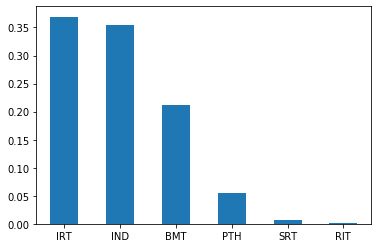

In [80]:
df['division'].value_counts(normalize=True).plot(kind='bar', rot=0)

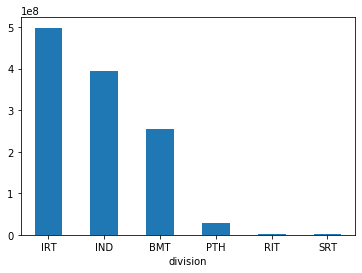

In [81]:
df.groupby('division')['entries_diff'].sum().sort_values(ascending=False).plot(kind='bar', rot=0)

## Distribuição de Entries por datas

### Dia da semana

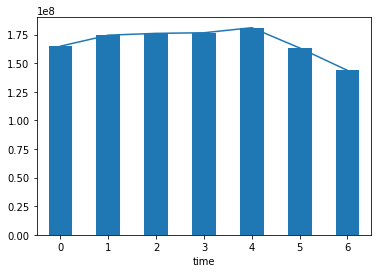

In [83]:
df_dayofweek_count = df.groupby(df.time.dt.dayofweek)['entries_diff'].sum()
ax=df_dayofweek_count.plot(kind='bar')
df_dayofweek_count.plot(ax=ax)

### Hora do dia

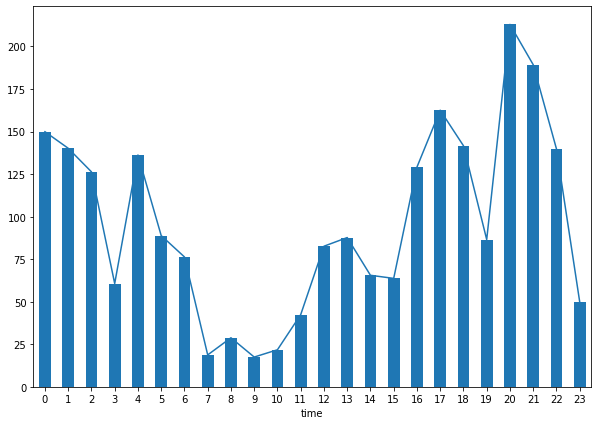

In [84]:
df_hour_count = df.groupby(df.time.dt.hour)['entries_diff'].mean()
ax=df_hour_count.plot(kind='bar', figsize=(10, 7))
df_hour_count.plot(ax=ax)

### Mês

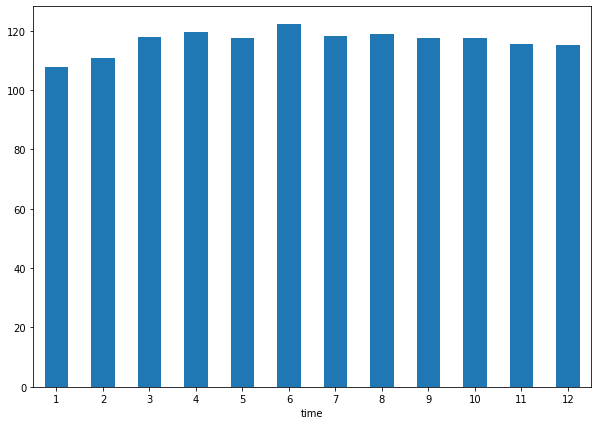

In [86]:
df_hour_count = df.groupby(df.time.dt.month)['entries_diff'].mean()
ax=df_hour_count.plot(kind='bar', figsize=(10, 7), rot=0)

## Conclusões

- A base de dados é bem grande (considerando que essa análise foi feita para um ano apenas e existem outros) e tem diversos níveis que podem ser analisadas (CA, Station, etc).
- Existem diversas divisões no metrô de NYC.
- Os dados apresentam ruídos, mudanças de escala e algumas lacunas de informação. Além disso, o tempo nem sempre é regular, a proposta é dos intervalos serem de 4h, mas tem linhas que o intervalo geralmente é de 4h12min, por exemplo. 
- É necessário alguns tratamento nos dados. Nesse notebook, foi realizado um tratamento mais específico e detalhado em uma amostra e outras generalizações. Esta última precisa ser analisada com mais detalhes, pois os dados são bem diversos.
- A amostra filtratada e refinada foi exportada para uma etapa posterior de modelagem.
- A base contém informações de entrada e saída. Nesse trabalho foi selecionado o valor de Entries (entradas) como a informação a ser modelada. O dado foi tratado para conter as informações do intervalo ao invés do acumulado.